# Grid search benchmarks

These benchmarks are not for the toolbox paper yet. The goal is to decide on the implementation of optimization in the toolbox and along the way establish a pipeline for how to run benchmarks.

Questions of interest:

- Were the true parameter recovered in each case?
- How long did each job take
- How to process the trial_posteriors into meaningful info/plots

In [1]:
library(tidyverse)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.2     v readr     2.1.4
v forcats   1.0.0     v stringr   1.5.0
v ggplot2   3.4.2     v tibble    3.2.1
v lubridate 1.9.2     v tidyr     1.3.0
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## True parameter recovery

True parameters for simulated data were: `d = 0.007, σ = 0.03, θ = .6, barrier = 1, decay = 0, nonDecisionTime = 100, bias = 0.0`

In [39]:
files_path = "./outputs/"
files_path

[1] "./outputs/"

In [40]:
param_files = list.files(files_path, pattern = "_best_pars.csv")
param_files

[1] "grid_search_floop2_seq_seq_best_pars.csv"         
 [2] "grid_search_floop2_seq_thread_best_pars.csv"      
 [3] "grid_search_floop2_thread_seq_best_pars.csv"      
 [4] "grid_search_floop2_thread_thread_best_pars.csv"   
 [5] "grid_search_floop_seq_seq_best_pars.csv"          
 [6] "grid_search_floop_seq_thread_best_pars.csv"       
 [7] "grid_search_floop_thread_seq_best_pars.csv"       
 [8] "grid_search_floop_thread_thread_best_pars.csv"    
 [9] "grid_search_thread_seq_seq_best_pars.csv"         
[10] "grid_search_thread_seq_thread_best_pars.csv"      
[11] "grid_search_thread_thread_seq_best_pars.csv"      
[12] "grid_search_thread_thread_thread_best_pars.csv"   
[13] "gs_floop_improvements_seq_seq_best_pars.csv"      
[14] "gs_floop_improvements_seq_thread_best_pars.csv"   
[15] "gs_floop_improvements_thread_seq_best_pars.csv"   
[16] "gs_floop_improvements_thread_thread_best_pars.csv"

In [41]:
length(param_files)

[1] 16

In [42]:
fn = param_files[1]
fn_info = strsplit(fn, "_")[[1]]
fn_info

[1] "grid"     "search"   "floop2"   "seq"      "seq"      "best"     "pars.csv"

In [43]:
best_pars = tibble()
for (fn in param_files) {
  cur_pars = read.csv(paste0(files_path, fn))
  if(!("likelihood_fn" %in% names(cur_pars))){
    cur_pars$likelihood_fn = "ADDM.aDDM_get_trial_likelihood"
  }
  cur_pars = cur_pars %>% select(barrier,bias,d,decay,likelihood_fn,nonDecisionTime,sigma,theta)
  fn_info = strsplit(fn, "_")[[1]]
  cur_pars$grid_fn = fn_info[3]
  cur_pars$grid_exec = fn_info[4]
  cur_pars$trials_exec = fn_info[5]
  best_pars = bind_rows(best_pars, cur_pars)

}

All jobs recovered the same but wrong (though very close) parameters. .009 for d instead of .007, .04 for sigma instead of .03.

In [44]:
best_pars

barrier,bias,d,decay,likelihood_fn,nonDecisionTime,sigma,theta,grid_fn,grid_exec,trials_exec
<int>,<dbl>,<dbl>,<int>,<chr>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,0,0.009,0,ADDM.aDDM_get_trial_likelihood,100,0.04,0.6,floop2,seq,seq
1,0,0.009,0,ADDM.aDDM_get_trial_likelihood,100,0.04,0.6,floop2,seq,thread
1,0,0.009,0,ADDM.aDDM_get_trial_likelihood,100,0.04,0.6,floop2,thread,seq
1,0,0.009,0,ADDM.aDDM_get_trial_likelihood,100,0.04,0.6,floop2,thread,thread
1,0,0.009,0,ADDM.aDDM_get_trial_likelihood,100,0.04,0.6,floop,seq,seq
1,0,0.009,0,ADDM.aDDM_get_trial_likelihood,100,0.04,0.6,floop,seq,thread
1,0,0.009,0,ADDM.aDDM_get_trial_likelihood,100,0.04,0.6,floop,thread,seq
1,0,0.009,0,ADDM.aDDM_get_trial_likelihood,100,0.04,0.6,floop,thread,thread
1,0,0.009,0,ADDM.aDDM_get_trial_likelihood,100,0.04,0.6,thread,seq,seq


## Job duration 

In [46]:
time_files = list.files(files_path, pattern = "_b_time.csv")
time_files

[1] "grid_search_floop2_seq_seq_b_time.csv"         
 [2] "grid_search_floop2_seq_thread_b_time.csv"      
 [3] "grid_search_floop2_thread_seq_b_time.csv"      
 [4] "grid_search_floop2_thread_thread_b_time.csv"   
 [5] "grid_search_floop_seq_seq_b_time.csv"          
 [6] "grid_search_floop_seq_thread_b_time.csv"       
 [7] "grid_search_floop_thread_seq_b_time.csv"       
 [8] "grid_search_floop_thread_thread_b_time.csv"    
 [9] "grid_search_thread_seq_seq_b_time.csv"         
[10] "grid_search_thread_seq_thread_b_time.csv"      
[11] "grid_search_thread_thread_seq_b_time.csv"      
[12] "grid_search_thread_thread_thread_b_time.csv"   
[13] "gs_floop_improvements_seq_seq_b_time.csv"      
[14] "gs_floop_improvements_seq_thread_b_time.csv"   
[15] "gs_floop_improvements_thread_seq_b_time.csv"   
[16] "gs_floop_improvements_thread_thread_b_time.csv"

In [47]:
fn = time_files[1]
fn_info = strsplit(fn, "_")[[1]]
fn_info

[1] "grid"     "search"   "floop2"   "seq"      "seq"      "b"        "time.csv"

In [52]:
b_time = tibble()
for (fn in time_files) {
  cur_time = read.csv(paste0(files_path, fn))
  if(!("grid_search_fn" %in% names(cur_time))){
    cur_time$grid_search_fn = "improvements"
  }
  b_time = bind_rows(b_time, cur_time)

}

Not parallelizing anything is (expectedly) the slowest option.

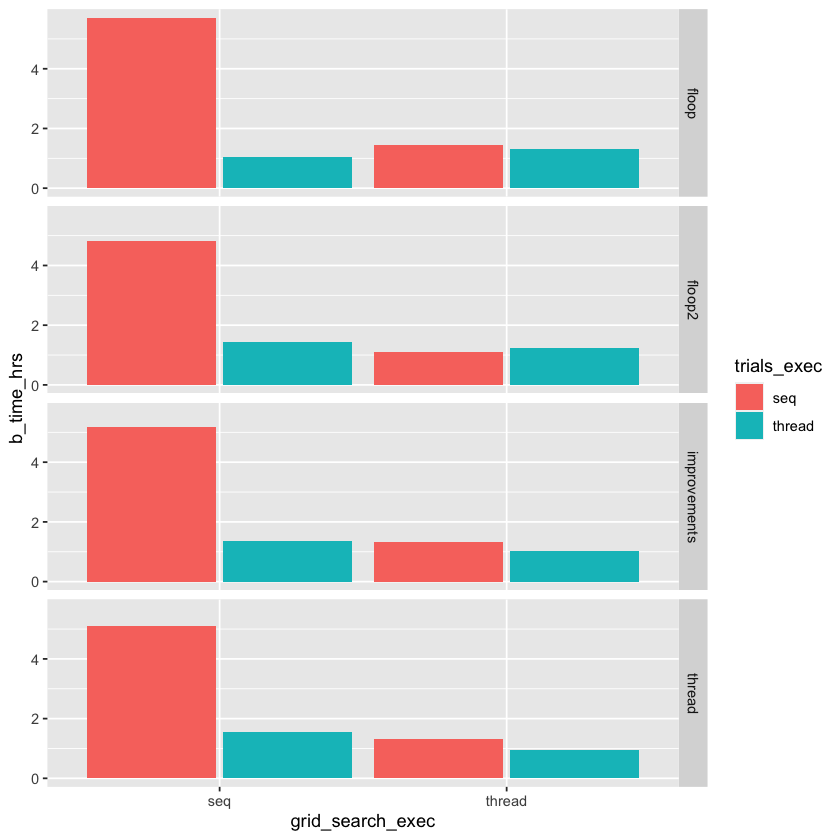

In [66]:
b_time %>%
  mutate(b_time_sec = b_time/10^9,
         b_time_mins = b_time_sec/60,
         b_time_hrs = b_time_mins/60) %>%
  ggplot(aes(grid_search_exec, b_time_hrs, fill = trials_exec)) +
    geom_bar(stat = "identity", position = position_dodge(width=.95)) +
    facet_grid(grid_search_fn ~.)

Looking only at options where at least one thing is parallelized, the differences are smaller. Not entirely expectedly parallelizing both things is not always the fastest option across different implementations. Still, the fastest overall is when both things are parallelizied with either only threads or with improved floop2. Note, improvements was probably run with slightly less resources on this iteration and it's not clear how the jobs are spread over threads.

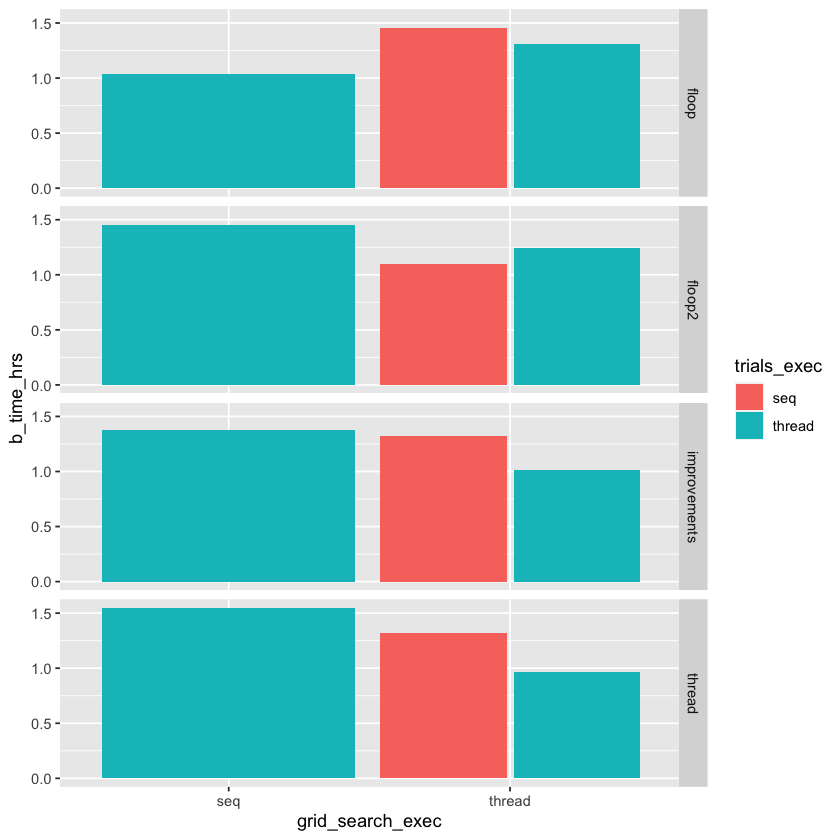

In [72]:
b_time %>%
  mutate(b_time_sec = b_time/10^9,
         b_time_mins = b_time_sec/60,
         b_time_hrs = b_time_mins/60) %>%
  filter(!((grid_search_exec == "seq") & (trials_exec == "seq"))) %>%
  ggplot(aes(grid_search_exec, b_time_hrs, fill = trials_exec)) +
    geom_bar(stat = "identity", position = position_dodge(width=.95)) +
    facet_grid(grid_search_fn ~.)

In [73]:
b_time %>%
  mutate(b_time_sec = b_time/10^9,
         b_time_mins = b_time_sec/60,
         b_time_hrs = b_time_mins/60) %>%
  arrange(b_time_hrs)

grid_search_fn,grid_search_exec,trials_exec,b_time,b_mem,b_time_sec,b_time_mins,b_time_hrs
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
thread,thread,thread,3.467470e+12,1.235976e+13,3467.470,57.79116,0.9631861
improvements,thread,thread,3.639694e+12,1.236418e+13,3639.694,60.66157,1.0110261
floop,seq,thread,3.716735e+12,1.235976e+13,3716.735,61.94559,1.0324265
floop2,thread,seq,3.954344e+12,1.235964e+13,3954.344,65.90573,1.0984289
floop2,thread,thread,4.490720e+12,1.235978e+13,4490.720,74.84533,1.2474221
floop,thread,thread,4.728246e+12,1.235976e+13,4728.246,78.80410,1.3134017
thread,thread,seq,4.761058e+12,1.235954e+13,4761.058,79.35097,1.3225161
improvements,thread,seq,4.774465e+12,1.236403e+13,4774.465,79.57442,1.3262403
improvements,seq,thread,4.948765e+12,1.236418e+13,4948.765,82.47942,1.3746570


## Output processing

How confident is the estimation on the incorrect parameters?

In [74]:
trial_posteriors = list.files(files_path, pattern = "_trial_posteriors.csv")
trial_posteriors

[1] "grid_search_floop2_seq_seq_trial_posteriors.csv"         
 [2] "grid_search_floop2_seq_thread_trial_posteriors.csv"      
 [3] "grid_search_floop2_thread_seq_trial_posteriors.csv"      
 [4] "grid_search_floop2_thread_thread_trial_posteriors.csv"   
 [5] "grid_search_floop_seq_seq_trial_posteriors.csv"          
 [6] "grid_search_floop_seq_thread_trial_posteriors.csv"       
 [7] "grid_search_floop_thread_seq_trial_posteriors.csv"       
 [8] "grid_search_floop_thread_thread_trial_posteriors.csv"    
 [9] "grid_search_thread_seq_seq_trial_posteriors.csv"         
[10] "grid_search_thread_seq_thread_trial_posteriors.csv"      
[11] "grid_search_thread_thread_seq_trial_posteriors.csv"      
[12] "grid_search_thread_thread_thread_trial_posteriors.csv"   
[13] "gs_floop_improvements_seq_seq_trial_posteriors.csv"      
[14] "gs_floop_improvements_seq_thread_trial_posteriors.csv"   
[15] "gs_floop_improvements_thread_seq_trial_posteriors.csv"   
[16] "gs_floop_improvements_thread_thread_trial_posteriors.csv"

In [76]:
fn = trial_posteriors[16]
fn_info = strsplit(fn, "_")[[1]]
fn_info

[1] "gs"             "floop"          "improvements"   "thread"        
[5] "thread"         "trial"          "posteriors.csv"

In [78]:
cur_posteriors = read.csv(paste0(files_path, fn))

In [79]:
head(cur_posteriors)

,trial_num,posterior,d,sigma,theta,likelihood_fn
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1,3.660010e-05,0.017,0.14,0.6,ADDM.aDDM_get_trial_likelihood
2,2,3.608999e-06,0.017,0.14,0.6,ADDM.aDDM_get_trial_likelihood
3,3,8.871811e-08,0.017,0.14,0.6,ADDM.aDDM_get_trial_likelihood
4,4,2.760650e-09,0.017,0.14,0.6,ADDM.aDDM_get_trial_likelihood
5,5,3.929303e-10,0.017,0.14,0.6,ADDM.aDDM_get_trial_likelihood
6,6,7.172733e-12,0.017,0.14,0.6,ADDM.aDDM_get_trial_likelihood


Check number of parameter combinations. Should be 8000 for 1500 trials.

In [82]:
nrow(cur_posteriors %>% count(d, sigma, theta))

[1] 8000

For each value of theta plot the likelihood heatmap for d and sigma after the last trial

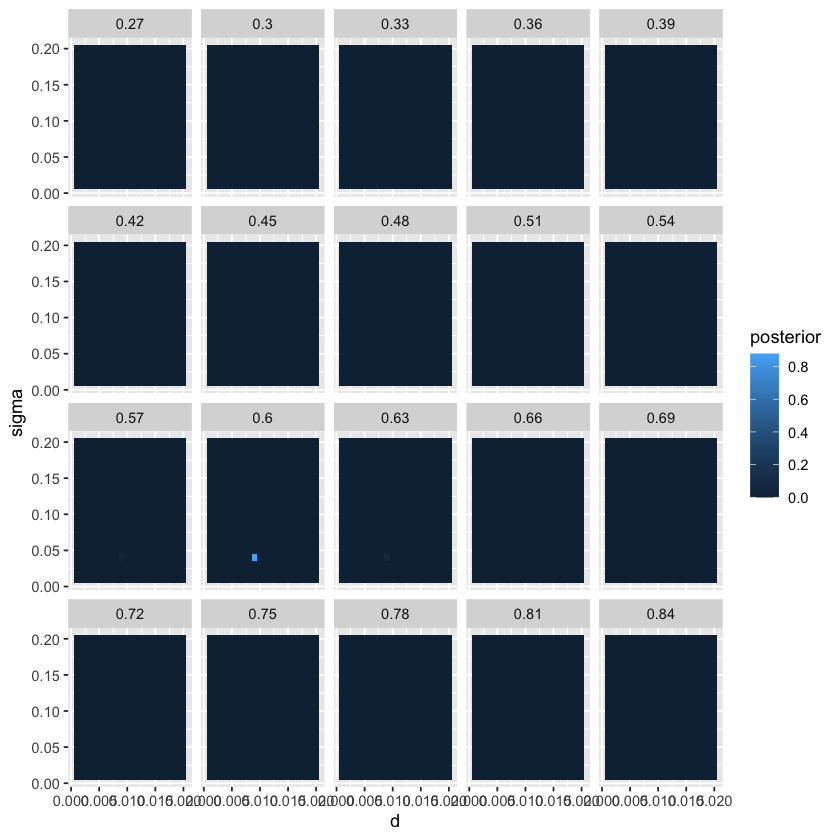

In [84]:
cur_posteriors %>%
  filter(trial_num == max(trial_num)) %>%
  ggplot(aes(d, sigma, fill = posterior))+
  geom_tile()+
  facet_wrap(~theta)

There is only a slight uncertainty over theta. Not the incorrectly recovered d and sigma.

In [86]:
head(cur_posteriors %>%
  filter(trial_num == max(trial_num)) %>%
  arrange(-posterior))

,trial_num,posterior,d,sigma,theta,likelihood_fn
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1500,8.785521e-01,0.009,0.04,0.60,ADDM.aDDM_get_trial_likelihood
2,1500,6.834078e-02,0.009,0.04,0.63,ADDM.aDDM_get_trial_likelihood
3,1500,5.306750e-02,0.009,0.04,0.57,ADDM.aDDM_get_trial_likelihood
4,1500,2.432852e-05,0.009,0.04,0.66,ADDM.aDDM_get_trial_likelihood
5,1500,1.527613e-05,0.009,0.04,0.54,ADDM.aDDM_get_trial_likelihood
6,1500,3.815709e-11,0.009,0.04,0.69,ADDM.aDDM_get_trial_likelihood


How does the posterior of the true combination evolve over trials compared to the three combinations that have the highest probability mass after all trials?  

The true combination never moves. Does it need a smaller state step size?

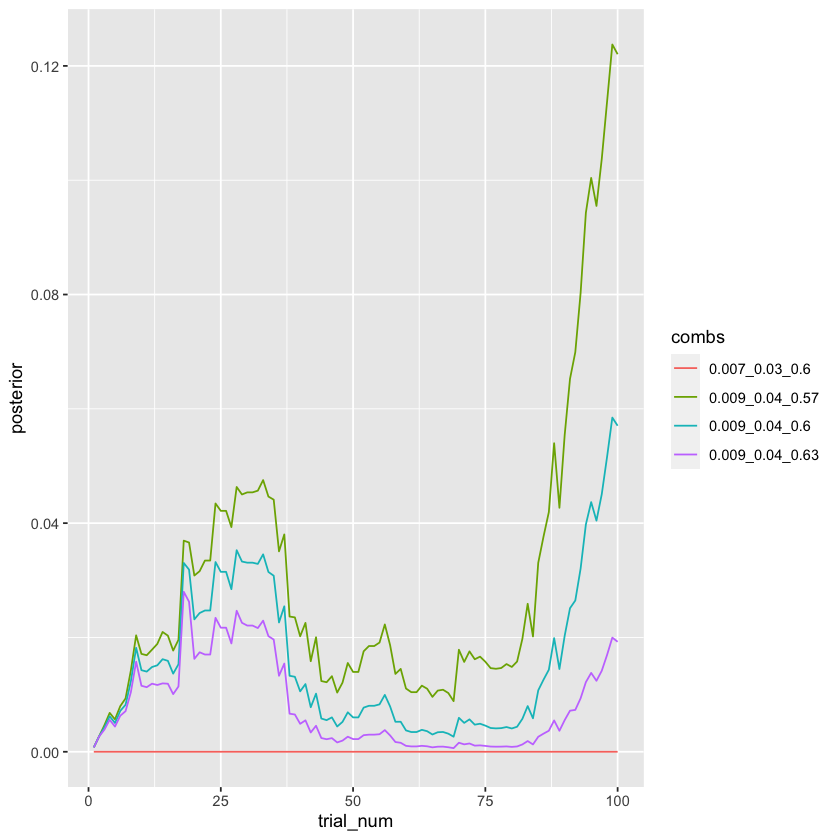

In [89]:
cur_posteriors %>% 
  # filter(trial_num < 101) %>%
  mutate(combs = paste0(d, "_", sigma, "_", theta)) %>%
  filter((combs == "0.009_0.04_0.6") | (combs == "0.009_0.04_0.63") | (combs == "0.009_0.04_0.57") | (combs == "0.007_0.03_0.6")) %>%
  ggplot(aes(trial_num, posterior, color = combs)) +
  geom_line()


## Equal resources

In [93]:
param_files = list.files(files_path, pattern = "2024-03[^/]*best_pars.csv")
param_files

[1] "grid_search_floop2_seq_thread_2024-03-26_best_pars.csv"      
 [2] "grid_search_floop2_thread_seq_2024-03-26_best_pars.csv"      
 [3] "grid_search_floop2_thread_thread_2024-03-26_best_pars.csv"   
 [4] "grid_search_floop_seq_thread_2024-03-25_best_pars.csv"       
 [5] "grid_search_floop_thread_seq_2024-03-25_best_pars.csv"       
 [6] "grid_search_floop_thread_thread_2024-03-26_best_pars.csv"    
 [7] "grid_search_thread_seq_thread_2024-03-26_best_pars.csv"      
 [8] "grid_search_thread_thread_seq_2024-03-26_best_pars.csv"      
 [9] "grid_search_thread_thread_thread_2024-03-25_best_pars.csv"   
[10] "gs_floop_improvements_seq_thread_2024-03-26_best_pars.csv"   
[11] "gs_floop_improvements_thread_seq_2024-03-26_best_pars.csv"   
[12] "gs_floop_improvements_thread_thread_2024-03-26_best_pars.csv"

In [94]:
best_pars = tibble()
for (fn in param_files) {
  cur_pars = read.csv(paste0(files_path, fn))
  if(!("likelihood_fn" %in% names(cur_pars))){
    cur_pars$likelihood_fn = "ADDM.aDDM_get_trial_likelihood"
  }
  cur_pars = cur_pars %>% select(barrier,bias,d,decay,likelihood_fn,nonDecisionTime,sigma,theta)
  fn_info = strsplit(fn, "_")[[1]]
  cur_pars$grid_fn = fn_info[3]
  cur_pars$grid_exec = fn_info[4]
  cur_pars$trials_exec = fn_info[5]
  best_pars = bind_rows(best_pars, cur_pars)

}

Recovered the same incorrect parameters as before.

In [95]:
best_pars

barrier,bias,d,decay,likelihood_fn,nonDecisionTime,sigma,theta,grid_fn,grid_exec,trials_exec
<int>,<dbl>,<dbl>,<int>,<chr>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,0,0.009,0,ADDM.aDDM_get_trial_likelihood,100,0.04,0.6,floop2,seq,thread
1,0,0.009,0,ADDM.aDDM_get_trial_likelihood,100,0.04,0.6,floop2,thread,seq
1,0,0.009,0,ADDM.aDDM_get_trial_likelihood,100,0.04,0.6,floop2,thread,thread
1,0,0.009,0,ADDM.aDDM_get_trial_likelihood,100,0.04,0.6,floop,seq,thread
1,0,0.009,0,ADDM.aDDM_get_trial_likelihood,100,0.04,0.6,floop,thread,seq
1,0,0.009,0,ADDM.aDDM_get_trial_likelihood,100,0.04,0.6,floop,thread,thread
1,0,0.009,0,ADDM.aDDM_get_trial_likelihood,100,0.04,0.6,thread,seq,thread
1,0,0.009,0,ADDM.aDDM_get_trial_likelihood,100,0.04,0.6,thread,thread,seq
1,0,0.009,0,ADDM.aDDM_get_trial_likelihood,100,0.04,0.6,thread,thread,thread


In [96]:
time_files = list.files(files_path, pattern = "2024-03[^/]*b_time.csv")
time_files

[1] "grid_search_floop2_seq_thread_2024-03-26_b_time.csv"      
 [2] "grid_search_floop2_thread_seq_2024-03-26_b_time.csv"      
 [3] "grid_search_floop2_thread_thread_2024-03-26_b_time.csv"   
 [4] "grid_search_floop_seq_thread_2024-03-25_b_time.csv"       
 [5] "grid_search_floop_thread_seq_2024-03-25_b_time.csv"       
 [6] "grid_search_floop_thread_thread_2024-03-26_b_time.csv"    
 [7] "grid_search_thread_seq_thread_2024-03-26_b_time.csv"      
 [8] "grid_search_thread_thread_seq_2024-03-26_b_time.csv"      
 [9] "grid_search_thread_thread_thread_2024-03-25_b_time.csv"   
[10] "gs_floop_improvements_seq_thread_2024-03-26_b_time.csv"   
[11] "gs_floop_improvements_thread_seq_2024-03-26_b_time.csv"   
[12] "gs_floop_improvements_thread_thread_2024-03-26_b_time.csv"

In [97]:
b_time = tibble()
for (fn in time_files) {
  cur_time = read.csv(paste0(files_path, fn))
  if(!("grid_search_fn" %in% names(cur_time))){
    cur_time$grid_search_fn = "improvements"
  }
  b_time = bind_rows(b_time, cur_time)

}

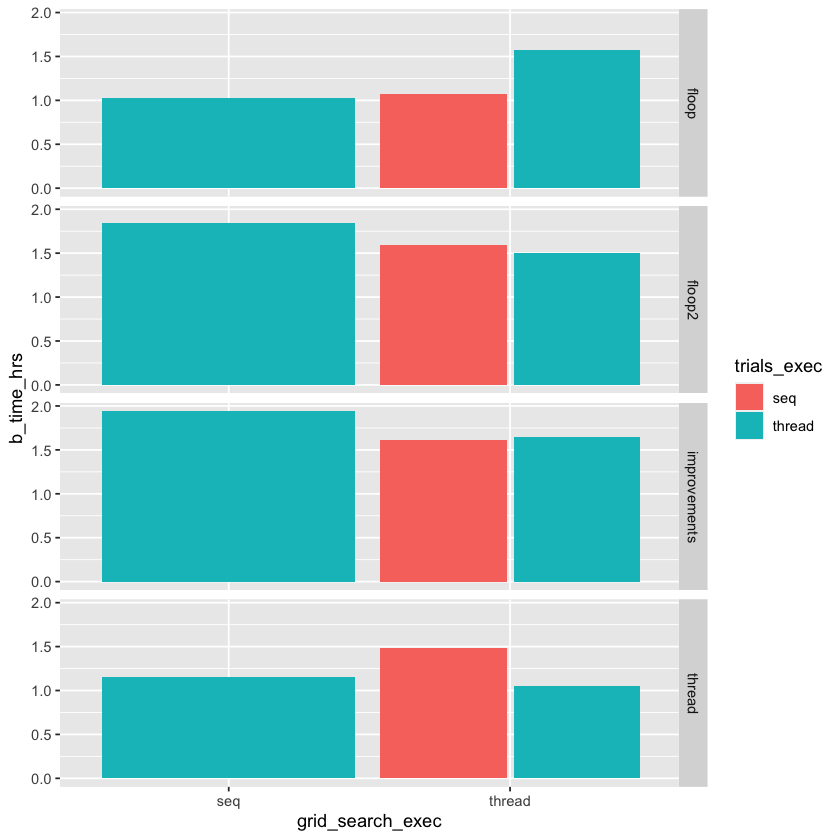

In [98]:
b_time %>%
  mutate(b_time_sec = b_time/10^9,
         b_time_mins = b_time_sec/60,
         b_time_hrs = b_time_mins/60) %>%
  ggplot(aes(grid_search_exec, b_time_hrs, fill = trials_exec)) +
    geom_bar(stat = "identity", position = position_dodge(width=.95)) +
    facet_grid(grid_search_fn ~.)

Surprisingly, threading both things is not faster than having one of the operations be sequential. I think this means that threading both operations does not mean a hierarchical organization takes place. So effectively only the trials are threaded. For a hierarhical organization using `DistributedEx` for `grid_search_exec` might be necessary. Note though that this is good news for sequential models. Throwing more cores for each parameter combination is just as helpful as parallelizing trials. So even if `trials_exec` has to be `seq` we can keep `grid_search_exec` to be `thread`. Of the options tried above `floop` for `grid_search_fn` seems to be the best for both `seq+thread` (when threads are used only over trials) and `thread+seq` (threads are used only over parameter combinations).

In [100]:
b_time %>%
  mutate(b_time_sec = b_time/10^9,
         b_time_mins = b_time_sec/60,
         b_time_hrs = b_time_mins/60) %>%
  arrange(b_time_hrs)

grid_search_fn,grid_search_exec,trials_exec,b_time,b_mem,nthreads,b_time_sec,b_time_mins,b_time_hrs
<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
floop,seq,thread,3.686613e+12,1.235969e+13,12,3686.613,61.44355,1.024059
thread,thread,thread,3.771039e+12,1.235969e+13,12,3771.039,62.85064,1.047511
floop,thread,seq,3.847485e+12,1.235954e+13,12,3847.485,64.12474,1.068746
thread,seq,thread,4.149086e+12,1.235969e+13,12,4149.086,69.15143,1.152524
thread,thread,seq,5.343134e+12,1.235954e+13,12,5343.134,89.05224,1.484204
floop2,thread,thread,5.394354e+12,1.235971e+13,12,5394.354,89.90589,1.498432
floop,thread,thread,5.654317e+12,1.235969e+13,12,5654.317,94.23861,1.570643
floop2,thread,seq,5.716290e+12,1.235964e+13,12,5716.290,95.27151,1.587858
improvements,thread,seq,5.793142e+12,1.236403e+13,12,5793.142,96.55237,1.609206


In [101]:
trial_posteriors = list.files(files_path, pattern = "2024-03[^/]*trial_posteriors.csv")
trial_posteriors

[1] "grid_search_floop2_seq_thread_2024-03-26_trial_posteriors.csv"      
 [2] "grid_search_floop2_thread_seq_2024-03-26_trial_posteriors.csv"      
 [3] "grid_search_floop2_thread_thread_2024-03-26_trial_posteriors.csv"   
 [4] "grid_search_floop_seq_thread_2024-03-25_trial_posteriors.csv"       
 [5] "grid_search_floop_thread_seq_2024-03-25_trial_posteriors.csv"       
 [6] "grid_search_floop_thread_thread_2024-03-26_trial_posteriors.csv"    
 [7] "grid_search_thread_seq_thread_2024-03-26_trial_posteriors.csv"      
 [8] "grid_search_thread_thread_seq_2024-03-26_trial_posteriors.csv"      
 [9] "grid_search_thread_thread_thread_2024-03-25_trial_posteriors.csv"   
[10] "gs_floop_improvements_seq_thread_2024-03-26_trial_posteriors.csv"   
[11] "gs_floop_improvements_thread_seq_2024-03-26_trial_posteriors.csv"   
[12] "gs_floop_improvements_thread_thread_2024-03-26_trial_posteriors.csv"

In [102]:
fn = trial_posteriors[4]
fn_info = strsplit(fn, "_")[[1]]
fn_info

[1] "grid"           "search"         "floop"          "seq"           
[5] "thread"         "2024-03-25"     "trial"          "posteriors.csv"

In [103]:
cur_posteriors = read.csv(paste0(files_path, fn))

In [104]:
nrow(cur_posteriors %>% count(d, sigma, theta))

[1] 8000

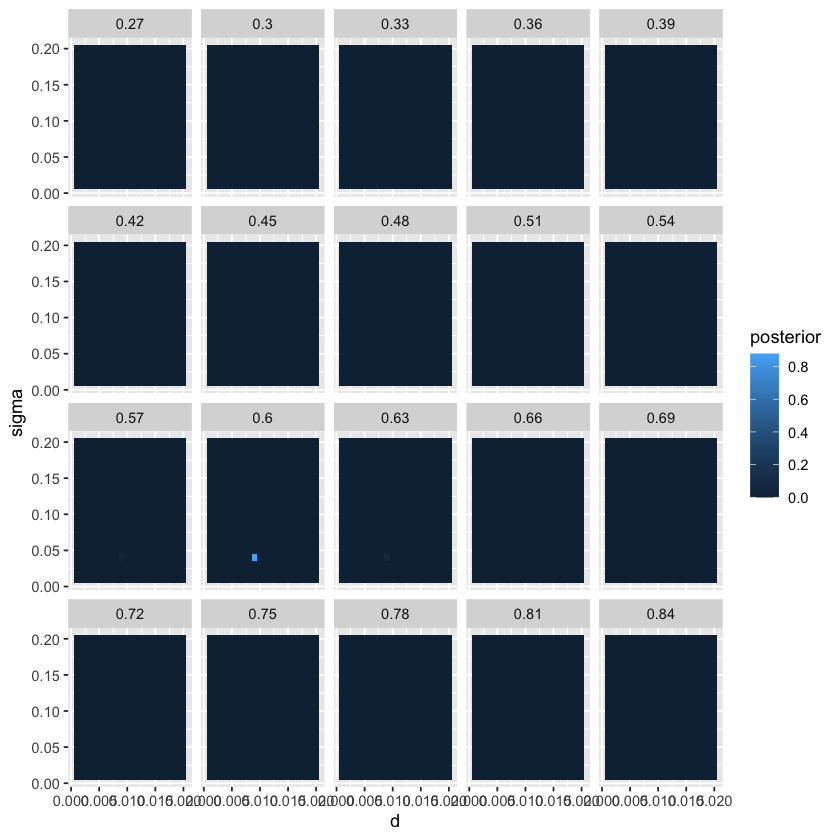

In [105]:
cur_posteriors %>%
  filter(trial_num == max(trial_num)) %>%
  ggplot(aes(d, sigma, fill = posterior))+
  geom_tile()+
  facet_wrap(~theta)

In [106]:
head(cur_posteriors %>%
  filter(trial_num == max(trial_num)) %>%
  arrange(-posterior))

,trial_num,posterior,d,sigma,theta
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1500,8.785521e-01,0.009,0.04,0.60
2,1500,6.834078e-02,0.009,0.04,0.63
3,1500,5.306750e-02,0.009,0.04,0.57
4,1500,2.432852e-05,0.009,0.04,0.66
5,1500,1.527613e-05,0.009,0.04,0.54
6,1500,3.815709e-11,0.009,0.04,0.69


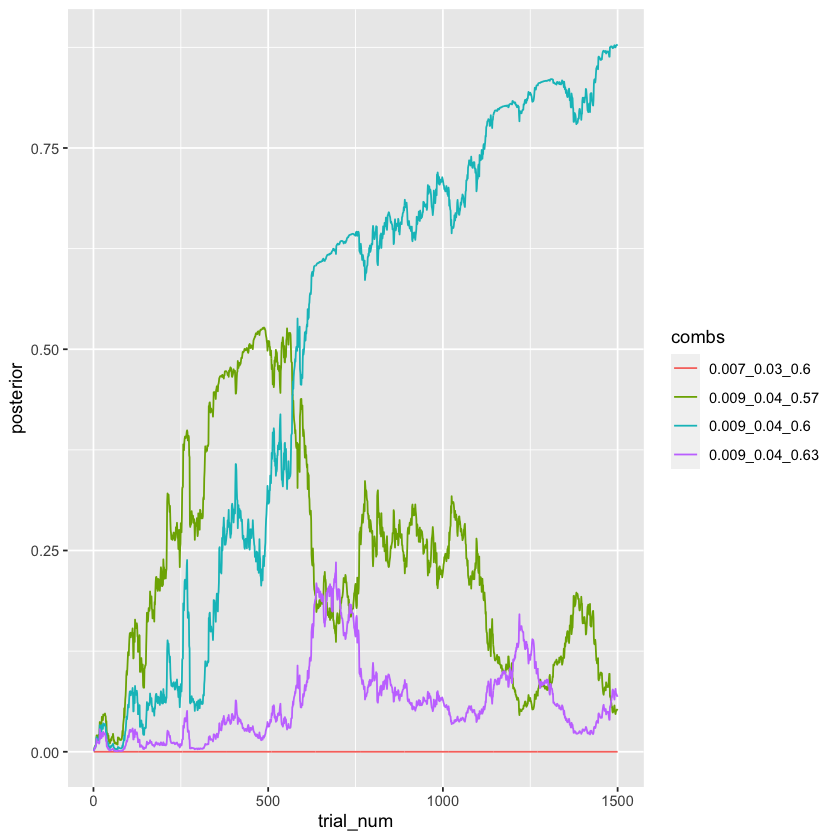

In [107]:
cur_posteriors %>% 
  # filter(trial_num < 101) %>%
  mutate(combs = paste0(d, "_", sigma, "_", theta)) %>%
  filter((combs == "0.009_0.04_0.6") | (combs == "0.009_0.04_0.63") | (combs == "0.009_0.04_0.57") | (combs == "0.007_0.03_0.6")) %>%
  ggplot(aes(trial_num, posterior, color = combs)) +
  geom_line()
